# Week 6 Project

# Description

In this project we are going to build a Convolutional Neural Network in an attempt to differentiate between lung Xrays between those with pneumonia and those with normal lung tissue. The images are in greyscale, since they are Xrays. Our dataset comes from https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images

## Convolutional Neural Networks
Good for images, a CNN is designed to recognize patterns via convolution. Convolution applies a filter that combs through an image, summing and "simplifying" the features on each image. Early passes will focus on things like edges, corners, and simple shapes. Middle layers will focus on textures and patterns. Deeper layers will focus on object parts, faces, and entire objects.

# Exploratory Data Analysis
Our data is made up of 5856 validated Chest X-ray images.
Our dataset is split up into training and test folders already, with each training and test folder having 2 folders respectively for lung xrays that have pneuomonia, and those that are of normal health. 

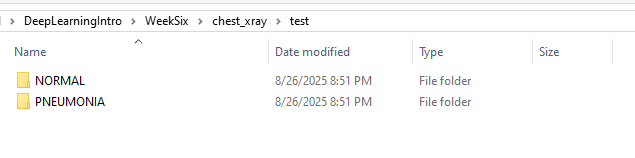

One thing of note - most if not all of these images are different sizes - this is an issue as CNN requires every image input to be of the same size.

Healthy Lung: 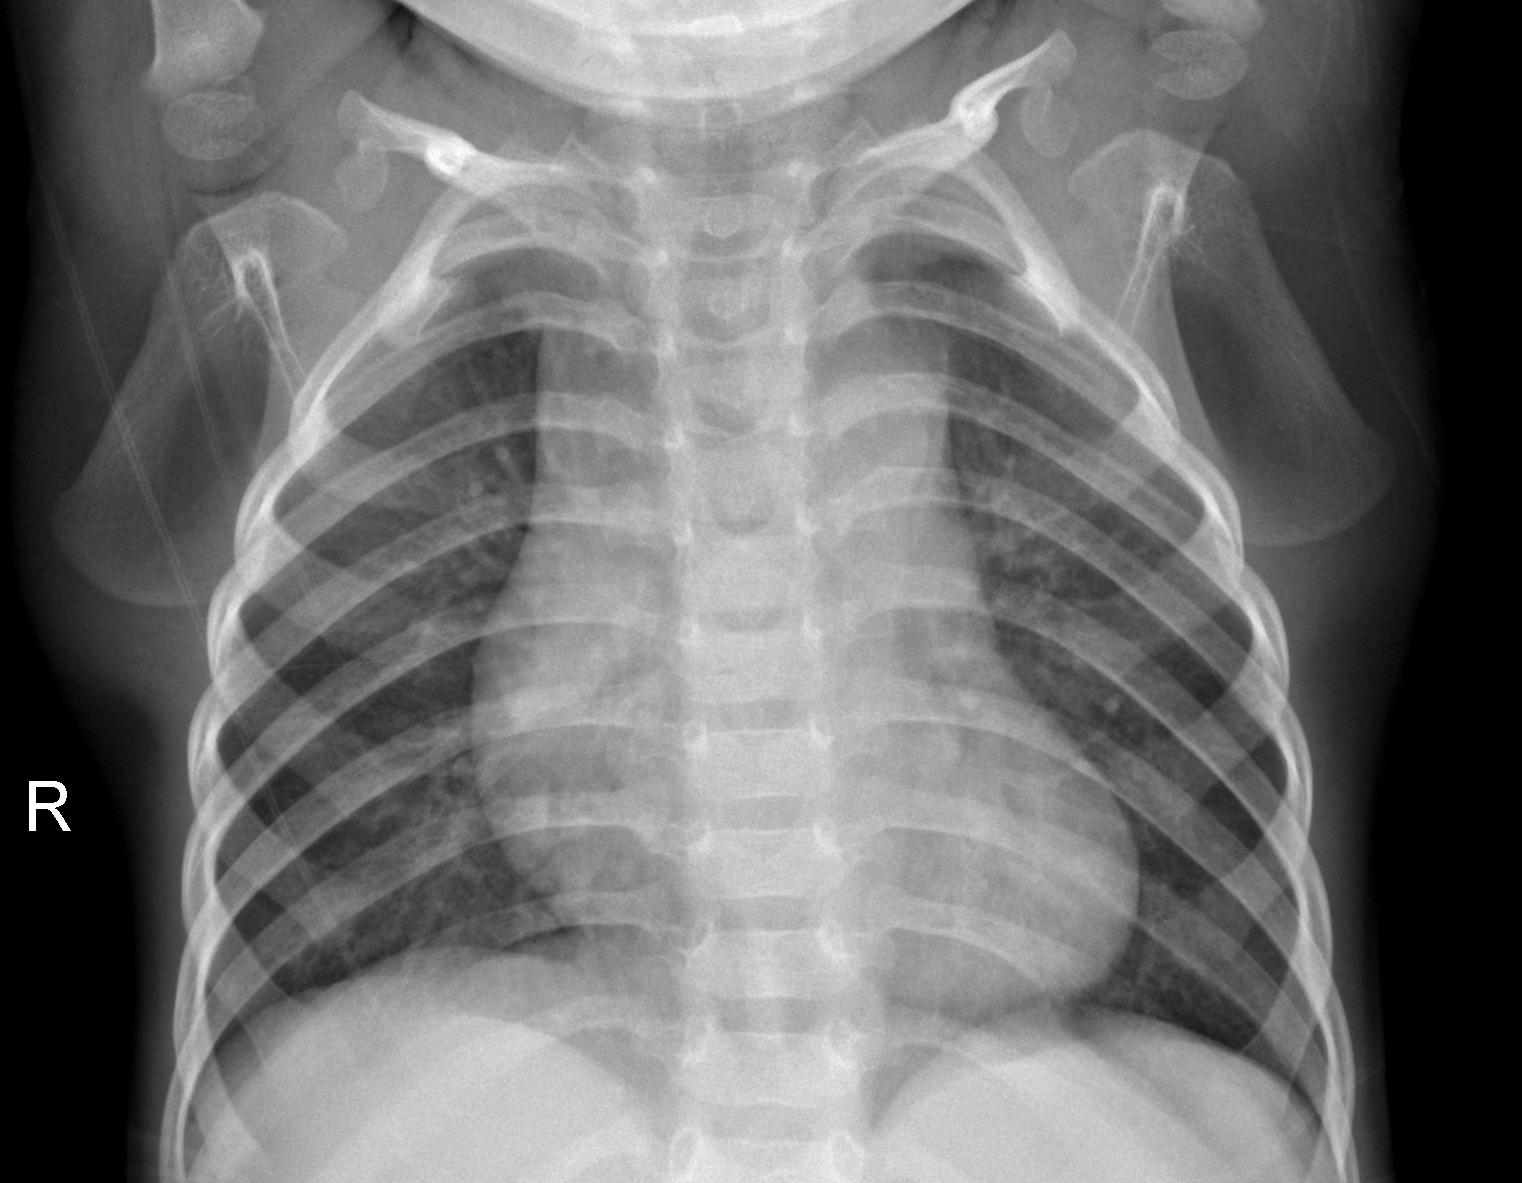

Pneumonic Lung: 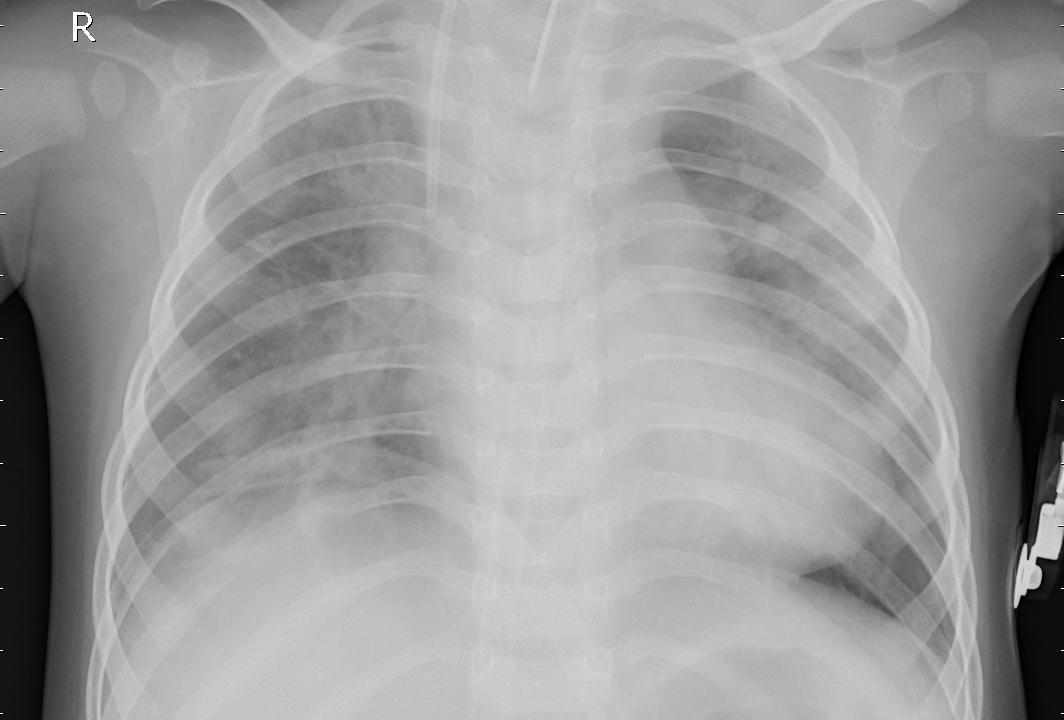

With this in mind, we will be making use of the "padding" strategy - if our image is smaller than our biggest image, we pad the empty space with zeroes. Eventually the model will learn to ignore the empty spaces and proceed as normal. 

For this, we will have to make use of the "same" padding variable in our Conv2D layers. HOWEVER, our dense layers require a fixed number of input features.  We can fix this by combining the "Same" padding with  GlobalAveragePooling2d layer right before our Dense layers. This makes it so that regardless of the input size, the pooling squeezes the feature maps to a fixed vector length.


In [3]:
import os
import random
from PIL import Image



In [4]:
import sys
print(sys.executable)


import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image



c:\Users\diego\AppData\Local\Programs\Python\Python310\python.exe


Lets take a look at how our data is split up and load it in:

In [5]:
import tensorflow as tf

dataset = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/diego/GradSchool/DeepLearningIntro/WeekSix/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/diego/GradSchool/DeepLearningIntro/WeekSix/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/diego/GradSchool/DeepLearningIntro/WeekSix/chest_xray/test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=42
)


Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
Found 624 files belonging to 2 classes.


# Model Architecture
Our Conv2D layers apply 32,64, and 128 learnable filters (3x3 each) to the input images. Each increase in the number of filters increases the complexity of the features able to be detected.

The parameter "activation=relu" replaces negative values with zeroes to introduce non-linearity.

As mentioned prior, the "padding" feature on "same" keeps the spacial dimensions the same on the output as it does with the input. This makes it so that the feature maps are aligned across convolution layers to preserve the spatial resolution.

By setting the parameter "input_shape" to None, we allow our input to be variable height and width.

Our MaxPooling2D layer downsamples the feature maps by taking the maximum value in each 2x2 block of the image, thus reducing the spatial size for reduced computation. It also lets us ignore small shifts in the image that would otherwise confound the model.

As mentioned earlier, the padding feature allows the output to keep the original variable input dimensions - but our dense layer absolutely requires images to be the same size. To remedy this, we will use the GlobalAveragePooling2D layer, which averages each feature map into just one number. E.G. A feature map of size (height x width x 128) will just become a vector of length 128.

Lastly, our Dense layer squashes output into 1 output neuron. Eseentially, we are forcing a binary decision between detecting whether an image in a lung has pneumonia or is healthy.




In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(None, None, 3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),   # makes Dense possible
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam',metrics =['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 64)    0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 global_average_pooling2d (  (None, 128)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1

In [14]:
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
131/131 [==============================] - 330s 3s/step - loss: 0.1243 - accuracy: 0.9570 - val_loss: 0.1010 - val_accuracy: 0.9646
Epoch 2/10
131/131 [==============================] - 341s 3s/step - loss: 0.1185 - accuracy: 0.9558 - val_loss: 0.0994 - val_accuracy: 0.9646
Epoch 3/10
131/131 [==============================] - 331s 3s/step - loss: 0.1160 - accuracy: 0.9572 - val_loss: 0.1016 - val_accuracy: 0.9579
Epoch 4/10
131/131 [==============================] - 333s 3s/step - loss: 0.1140 - accuracy: 0.9587 - val_loss: 0.1068 - val_accuracy: 0.9522
Epoch 5/10
131/131 [==============================] - 346s 3s/step - loss: 0.1181 - accuracy: 0.9544 - val_loss: 0.1053 - val_accuracy: 0.9541
Epoch 6/10
131/131 [==============================] - 330s 3s/step - loss: 0.1165 - accuracy: 0.9570 - val_loss: 0.1013 - val_accuracy: 0.9646
Epoch 7/10
131/131 [==============================] - 339s 3s/step - loss: 0.1132 - accuracy: 0.9603 - val_loss: 0.0964 - val_accuracy: 0.9646

In [15]:
model.save("week6_model_firstrun.keras")

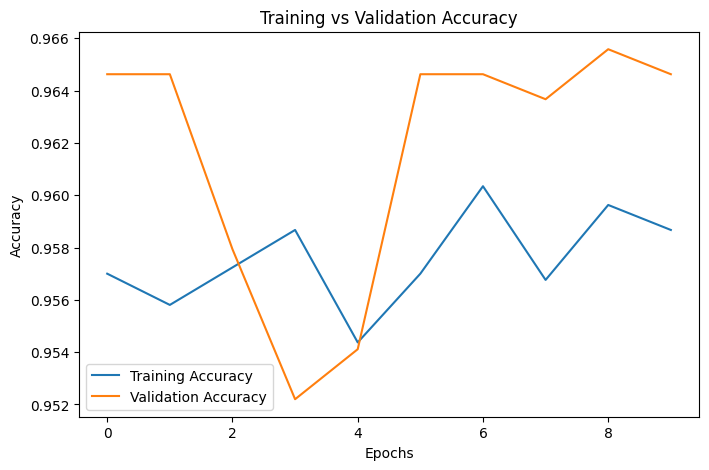

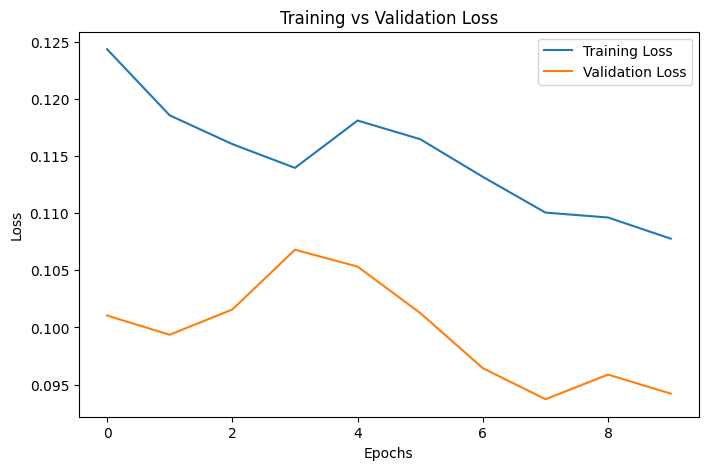

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

# Load entire model
week6_model = load_model("week6_model_firstrun.keras")

# Evaluate to confirm it works
week6_model.evaluate(test_dataset)
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

20/20 [==============================] - 11s 505ms/step - loss: 0.5394 - accuracy: 0.8221
20/20 - 10s - loss: 0.5394 - accuracy: 0.8221 - 10s/epoch - 518ms/step
Test Accuracy: 0.8221
Test Loss: 0.5394


# 1st Model Evaluation and Analysis:
Our training accuracy steadily increases from 71% to 93% by the 10th Epoch.

Our Validation accuracy starts from quite a bit higher - about 86% and also increases to about 94%, so no major divergences from the training data.

Our training loss shows strong learning, decreasing from 1.6 to 0.18, and our validation loss shows good generalization by decreasing from 0.37 to 0.14. This is also seen in the plots.

All in all, this is good news! Our model is learning and generalizing well without major overfitting.

Our test accuracy is sitting at about 82 % with a Test Loss of about 0.54, which is good! Not much overfitting, performing somewhat worse than our training data but not by much.

Let's try reducing our learning rate in case it begins to plateau and add an early stopper to stop training when validation loss stops improving. Both of these would prevent overfitting.



In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [8]:
history = model.fit(
    dataset,
    validation_data=val_dataset,
    epochs=20,                 
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/20
131/131 [==============================] - 354s 3s/step - loss: 1.0271 - accuracy: 0.7406 - val_loss: 0.2920 - val_accuracy: 0.8939 - lr: 0.0010
Epoch 2/20
131/131 [==============================] - 323s 2s/step - loss: 0.3028 - accuracy: 0.8731 - val_loss: 0.2263 - val_accuracy: 0.9168 - lr: 0.0010
Epoch 3/20
131/131 [==============================] - 315s 2s/step - loss: 0.2559 - accuracy: 0.9004 - val_loss: 0.2242 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 4/20
131/131 [==============================] - 333s 3s/step - loss: 0.2392 - accuracy: 0.9116 - val_loss: 0.1820 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 5/20
131/131 [==============================] - 331s 3s/step - loss: 0.2390 - accuracy: 0.9078 - val_loss: 0.1844 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 6/20
131/131 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.9159
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
131/131 [==============================] - 316s 

In [ ]:
model.save("week6_model.keras")

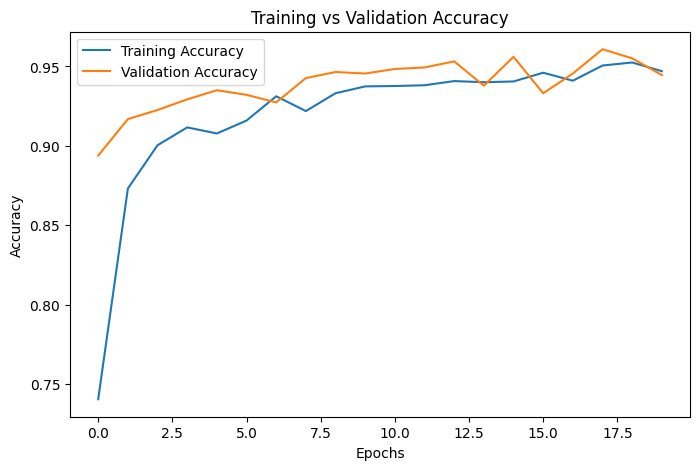

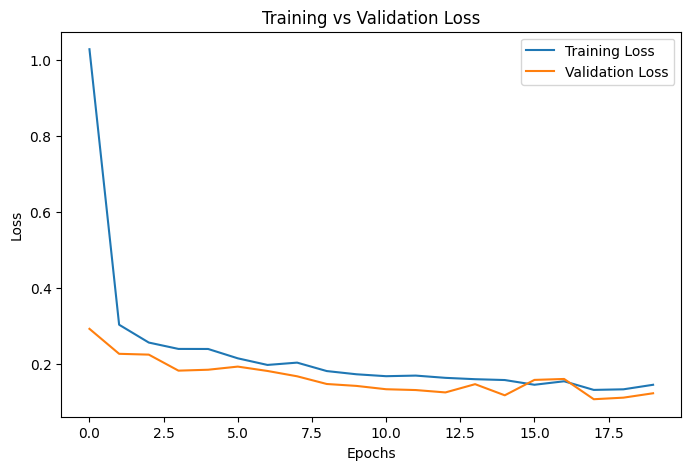

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

Let's check against the test dataset for accuracy and loss.

In [13]:
from tensorflow.keras.models import load_model

# Load entire model
week6_model = load_model("week6_model.keras")

# Evaluate to confirm it works
week6_model.evaluate(test_dataset)
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

20/20 [==============================] - 11s 497ms/step - loss: 0.7035 - accuracy: 0.7644
20/20 - 10s - loss: 0.7035 - accuracy: 0.7644 - 10s/epoch - 513ms/step
Test Accuracy: 0.7644
Test Loss: 0.7035


# Results
The gap between the validation accuracy (94%) to the test accuracy of 76% suggests overfitting in the model. Potentially, we could improve this a few different ways:

1. Transfer Learning - by using a pretrained model we could fine-tune our dataset.
2. Data Augmentation - add rotations, zooms, brightness/contrast to better simulate variation
3. Regularization - adding dropout layers
4. More data - 5000 images is nice and all, but what about 50,000?

# Conclusion

Our original model performs better by training with less epochs. Despite adding in early stoppage and learning rate reductions, our model with 20 epochs has a much larger gap between test and training accuracy, definitely suggestive of some overfitting despite the introduction of early stoppage and learning rate reduction. As can be seen in our plots for the second model, our accuracies and losses tend to plateau out as we continue through the epochs. 

Overall, CNN is a powerful tool for processing grid-style data like these images. By automatically learning hierarchical feature mappings through the convolutional layers, they can see local patterns like edges, textures, and higher-level shapes. However, performance depends on careful design choices, such as depth, filter sizes, learning rates, and regularization. They are very prone to overfitting if trained too much or without enough data.
Proper tuning is key to achieving a strong generalization.

